# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [50]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
validation_file= 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [51]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples

n_train = np.shape(X_train)[0]

# TODO: Number of testing examples.
n_test = np.shape(X_valid)[0]

# TODO: What's the shape of an traffic sign image?
image_shape = np.shape(X_train)[1:3]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 4410
Image data shape = (32, 32)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

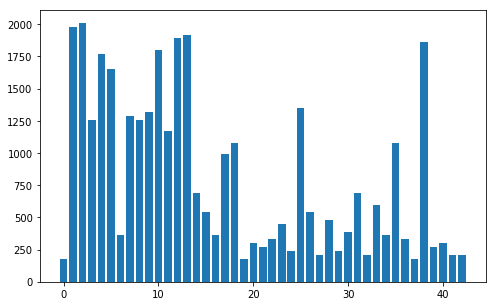

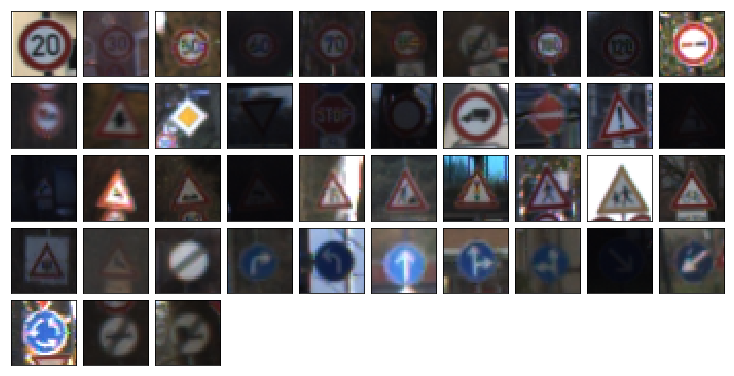

In [52]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import math
# Visualizations will be shown in the notebook.

%matplotlib inline

clazz_sample = [None] * n_classes
clazz_total = [0] * n_classes
for i in range(len(X_train)):
    clazz = y_train[i]
    clazz_total[clazz] += 1
    if clazz_sample[clazz] is None:
        clazz_sample[clazz] = X_train[i]

plt.figure(1, figsize=(8, 5))
plt.bar(range(n_classes), clazz_total)

plt.figure(2, figsize=(10,10))
nn = 10
for i in range(nn):
    for j in range(nn):
        n = i * nn + j
        if n >= n_classes:
            break
        ax = plt.subplot(nn, nn, n+1)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(clazz_sample[n])
plt.tight_layout(pad=0.0)
plt.show()

In [53]:
is_signnames_loaded = False

In [54]:
import pprint
if not is_signnames_loaded:
    signnames = {}
    with open('signnames.csv', 'r') as f:
        # skip the first line which is the header
        f.readline()
        for l in f.readlines():
            clazz,name = l.split(',')
            signnames[int(clazz,10)] = name.strip()
print("Sign names loaded.")
pprint.pprint(signnames)

Sign names loaded.
{0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at thend of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [55]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.

# state for the input training set
is_ohe = False
is_randomized = False

Preprocessing including:
Grayscaling
Normalizing
Preprocessing train set
Preprocessing valid set
Preprocessing test set
Preprocessing done.
Original train image:
Preprocessed train image:


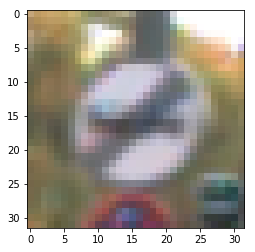

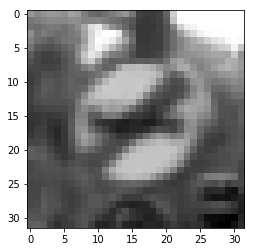

In [56]:
grayscaling_samples = True
normalizing = True

def normalize(input_minmax, output_minmax, val):
    return val / (input_minmax[1] - input_minmax[0]) * (output_minmax[1] - output_minmax[0]) + output_minmax[0]
def preprocess_input_image(image):
    import cv2
    output = np.array(image)
    if grayscaling_samples:
        output = np.array(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY))
    if normalizing:
        output = normalize((0, 255), (0.1, 0.9), output)
    return output

print("Preprocessing including:")
print("Grayscaling") if grayscaling_samples else None
print("Normalizing") if normalizing else None

print("Preprocessing train set")
X_train_input = np.array([preprocess_input_image(img) for img in X_train])
print("Preprocessing valid set")
X_valid_input = np.array([preprocess_input_image(img) for img in X_valid])
print("Preprocessing test set")
X_test_input = np.array([preprocess_input_image(img) for img in X_test])

print("Preprocessing done.")

print("Original train image:")
plt.figure(1)
plt.imshow(X_train[100])
print("Preprocessed train image:")
plt.figure(2)
plt.imshow(X_train_input[100], cmap='gray')

In [57]:
# always randomizing the input data set or randomize only once (checking against is_randomized)
always_randomizing = False
# join train set and valid set then resplit?
join_then_resplit = False

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

if not is_ohe:
    # one-hot encoding for outputs
    encoder = LabelBinarizer()
    encoder.fit(range(n_classes))
    y_train_output = encoder.transform(y_train)
    y_train_output = y_train_output.astype(np.float32)
    y_valid_output = encoder.transform(y_valid)
    y_valid_output = y_valid_output.astype(np.float32)
    y_test_output = encoder.transform(y_test)
    y_test_output = y_test_output.astype(np.float32)
    print("One-Hot-Encoding done.")
    is_ohe = True
    
if (not is_randomized) or always_randomizing:
    X_train_input, y_train_output = shuffle(X_train_input, y_train_output)
    print("Randomizing done.")
    is_randomized = True
    
if join_then_resplit:
    X = np.concatenate([X_train_input, X_valid_input])
    y = np.concatenate([y_train_output, y_valid_output])
    Xt, Xv, yt, yv = train_test_split(X, y, test_size=0.12, random_state=0)
    train_input, train_output = Xt, yt
    valid_input, valid_output = Xv, yv
    test_input, test_output = X_test_input, y_test_output
    print("Train set and valid set joined then resplitted.")
else:
    train_input, train_output = X_train_input, y_train_output
    valid_input, valid_output = X_valid_input, y_valid_output
    test_input, test_output = X_test_input, y_test_output

print("Preprocessing done.")
print(train_input.shape)

One-Hot-Encoding done.
Randomizing done.
Preprocessing done.
(34799, 32, 32)


In [58]:
if grayscaling_samples:
    train_in, train_out = np.reshape(train_input, (-1, 32, 32, 1)), train_output
    valid_in, valid_out = np.reshape(valid_input, (-1, 32, 32, 1)), valid_output
    test_in, test_out = np.reshape(test_input, (-1, 32, 32, 1)), test_output
    input_shape = image_shape + (1,)
else:
    train_in, train_out = train_input, train_output
    valid_in, valid_out = valid_input, valid_output
    test_in, test_out = test_input, test_output
    input_shape = image_shape + (3, )
print("Input shape: ", input_shape)

Input shape:  (32, 32, 1)


In [59]:
n_features = train_in.shape[1]
n_labels = train_out.shape[1]

print("Training set shape: ", np.shape(train_in), "Output shape: ", np.shape(train_out))
print("Validation set shape: ", np.shape(valid_in), "Output shape: ", np.shape(valid_out))
print("Test set shape: ", np.shape(test_in), "Output shape: ", np.shape(test_out))

print("Num of features per input: ", n_features)
print("Num of classes: ", n_labels)
print("Image shape: ", input_shape)


Training set shape:  (34799, 32, 32, 1) Output shape:  (34799, 43)
Validation set shape:  (4410, 32, 32, 1) Output shape:  (4410, 43)
Test set shape:  (12630, 32, 32, 1) Output shape:  (12630, 43)
Num of features per input:  32
Num of classes:  43
Image shape:  (32, 32, 1)


### Model Architecture

In [60]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

# hyper parameters here
learning_rate = 0.01
batch_size = 50
epochs = 60
mu = 0
sigma = 0.1
keep_prob = 0.5
# save model every other 'ckpt_interval'
ckpt_interval = 5

In [61]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

depth = 1 if grayscaling_samples else 3

print("Input depth: ", depth)

tf_inputs = tf.placeholder(tf.float32, (None, 32, 32, depth))
tf_labels = tf.placeholder(tf.float32, (None, n_labels)) 
tf_keep_prob = tf.placeholder(tf.float32)
# cnn model -- LeNet-5
# layer 1 - convolution from 32x32x1 to 28x28x16
conv1_W = tf.Variable(tf.truncated_normal(shape = (5, 5, depth, 16), mean = mu, stddev = sigma))
conv1_b = tf.Variable(tf.zeros(16))
conv1 = tf.nn.conv2d(tf_inputs, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
# relu activation
conv1 = tf.nn.relu(conv1)
# max pooling, output 14x14x16
conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

# layer 2 - convolution from 14x14x16 to 10x10x32
conv2_W = tf.Variable(tf.truncated_normal(shape = (5, 5, 16, 32), mean = mu, stddev = sigma))
conv2_b = tf.Variable(tf.zeros(32))
conv2 = tf.nn.conv2d(conv1, conv2_W, strides = [1, 1, 1, 1], padding='VALID') + conv2_b
# relu activation
conv2 = tf.nn.relu(conv2)
# max pooling, output 5x5x32
conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

# reshape to 800
fc0 = flatten(conv2)

# layer 3 - fully connected, 800 in, 400 out
fc1_W = tf.Variable(tf.truncated_normal(shape = (800, 400), mean = mu, stddev = sigma))
fc1_b = tf.Variable(tf.zeros(400))
fc1 = tf.matmul(fc0, fc1_W) + fc1_b
# relu activation
fc1 = tf.nn.relu(fc1)
fc1 = tf.nn.dropout(fc1, tf_keep_prob)

# layer 4 - fully connected, 400 in, 168 out
fc2_W = tf.Variable(tf.truncated_normal(shape = (400, 168), mean = mu, stddev = sigma))
fc2_b = tf.Variable(tf.zeros(168))
fc2 = tf.matmul(fc1, fc2_W) + fc2_b
# relu activation
fc2 = tf.nn.relu(fc2)
fc2 = tf.nn.dropout(fc2, tf_keep_prob)

# layer 5 (final) - fully connected, 168 in, 43(n_labels) out
fc3_W = tf.Variable(tf.truncated_normal(shape = (168, n_labels), mean = mu, stddev = sigma))
fc3_b = tf.Variable(tf.zeros(n_labels))
logits = tf.matmul(fc2, fc3_W) + fc3_b


# loss function and accuracy tester
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = tf_labels)
loss = tf.reduce_mean(cross_entropy)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(tf_labels, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)

saver = tf.train.Saver()

print("Model's ready.")

Input depth:  1
Model's ready.


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [62]:
# for getting train loss and train accuracy when network is too large
def getTrainLossAndAccuracyByBatchCalculation(session, loss, accuracy, train_in, train_out, batch_size = -1):
    len_input = len(train_in)
    if batch_size == -1:
        batch_size = len(train_in)
    l, a = 0, 0
    for batch_start in range(0, len_input, batch_size):
        t_in = train_in[batch_start:batch_start + batch_size]
        t_out = train_out[batch_start:batch_start + batch_size]
        batch_actual_size = len(t_in)
        bl, ba = session.run([loss, accuracy], feed_dict={tf_inputs: t_in, tf_labels: t_out, tf_keep_prob: keep_prob})
        # loss and accuracy are mean value. multiply by feeding batch size
        total_loss, total_corrects = bl * batch_actual_size, ba * batch_actual_size
        l += total_loss
        a += total_corrects
    return l / len_input, a / len_input

E001/060[TL:-------|VL:-------|TA:------|VA:------]:   0%|          | 0/696 [00:00<?, ?batches/s]

Start training
E: Epoch. TL: Last Train Loss. VL: Last Valid Loss. TA: Last Train Accuracy. VA: Last Valid Accuracy


E001/060[TL:-------|VL:-------|TA:------|VA:------]: 100%|██████████| 696/696 [00:09<00:00, 76.79batches/s]
E002/060[TL:3.46908|VL:3.49437|TA:0.0785|VA:0.1102]: 100%|██████████| 696/696 [00:08<00:00, 77.92batches/s]
E003/060[TL:3.14262|VL:3.12962|TA:0.1825|VA:0.2458]: 100%|██████████| 696/696 [00:08<00:00, 78.08batches/s]
E004/060[TL:2.52268|VL:2.37318|TA:0.3330|VA:0.4007]: 100%|██████████| 696/696 [00:08<00:00, 78.18batches/s]
E005/060[TL:2.00882|VL:1.78851|TA:0.4391|VA:0.4993]: 100%|██████████| 696/696 [00:08<00:00, 77.99batches/s]
E006/060[TL:1.64643|VL:1.37431|TA:0.5206|VA:0.6063]: 100%|██████████| 696/696 [00:08<00:00, 77.57batches/s]
E007/060[TL:1.33458|VL:1.07785|TA:0.6062|VA:0.7043]: 100%|██████████| 696/696 [00:08<00:00, 77.71batches/s]
E008/060[TL:1.13920|VL:0.89207|TA:0.6610|VA:0.7544]: 100%|██████████| 696/696 [00:08<00:00, 78.16batches/s]
E009/060[TL:0.97496|VL:0.76773|TA:0.7087|VA:0.7934]: 100%|██████████| 696/696 [00:08<00:00, 77.42batches/s]
E010/060[TL:0.84543|VL:0.653

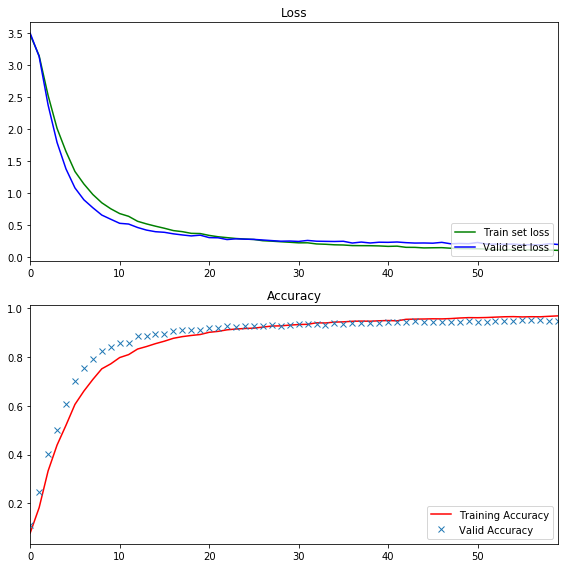

Accuracy on training set:  0.969453189872
Accuracy on validation set:  0.949887


In [63]:
from tqdm import tqdm
import math

print("Start training")
print("E: Epoch. TL: Last Train Loss. VL: Last Valid Loss. TA: Last Train Accuracy. VA: Last Valid Accuracy")

### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
train_feed_dict = {tf_inputs: train_in, tf_labels: train_out, tf_keep_prob : keep_prob}
valid_feed_dict = {tf_inputs: valid_in, tf_labels: valid_out, tf_keep_prob : 1.0}
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    last_tl, last_vl, last_ta, last_va = (-1, -1, -1, -1)
    batches = []
    l_train_log = []
    l_valid_log = []
    a_train_log = []
    a_valid_log = []
    num_batch = int(math.ceil(len(train_in) / batch_size))
    batch_log_step = 250
    softmaxs = []
    l_train, a_train = 0, 0
    for e in range(epochs):
        for i in tqdm(range(num_batch),unit="batches",
                      desc="E{:03}/{:03}[TL:{:>5.5f}|VL:{:>5.5f}|TA:{:.4f}|VA:{:.4f}]"\
                      .format(e+1, epochs, last_tl, last_vl, last_ta, last_va) \
                      if e > 0 else \
                      "E001/{:03}[TL:-------|VL:-------|TA:------|VA:------]".format(epochs)):
            batch_start, batch_end = i * batch_size, (i + 1) * batch_size
            batch_in = train_in[batch_start:batch_end]
            batch_out = train_out[batch_start:batch_end]
            sess.run(optimizer, feed_dict={tf_inputs: batch_in, tf_labels: batch_out, tf_keep_prob : keep_prob})
        
        batches.append(e)
        
        train_stat_batch_size = 6000
        l_train, a_train = getTrainLossAndAccuracyByBatchCalculation(sess, loss, accuracy, train_in, train_out, train_stat_batch_size)
        l_valid, a_valid = sess.run([loss, accuracy], feed_dict=valid_feed_dict)
        l_train_log.append(l_train)
        a_train_log.append(a_train)
        l_valid_log.append(l_valid)
        a_valid_log.append(a_valid)
        last_tl, last_vl, last_ta, last_va = l_train, l_valid, a_train, a_valid
        
        if (e + 1) % ckpt_interval == 0:
            path = "./cnn_{}.ckpt".format(e + 1)
            saver.save(sess, path)
    
    # final accuracy
    _, train_accuracy = getTrainLossAndAccuracyByBatchCalculation(sess, loss, accuracy, train_in, train_out, 6000)
    valid_accuracy = sess.run(accuracy, feed_dict=valid_feed_dict)
    
    plt.figure(figsize=(8,8))
    loss_plt = plt.subplot(211)
    loss_plt.set_title("Loss")
    loss_plt.plot(batches, l_train_log, 'g', label='Train set loss')
    loss_plt.plot(batches, l_valid_log, 'b', label='Valid set loss')
    loss_plt.set_xlim(batches[0], batches[-1])
    loss_plt.legend(loc=4)
    a_plt = plt.subplot(212)
    a_plt.set_title("Accuracy")
    a_plt.plot(batches, a_train_log, 'r', label='Training Accuracy')
    a_plt.plot(batches, a_valid_log, 'x', label='Valid Accuracy')
    a_plt.set_xlim(batches[0], batches[-1])
    a_plt.legend(loc=4)
    plt.tight_layout()
    plt.show()
    print("Accuracy on training set: ", train_accuracy)
    print("Accuracy on validation set: ", valid_accuracy)
    
    saver.save(sess, './cnn.ckpt')

In [65]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    # run model on test set
    test_feed_dict = {tf_inputs: test_in, tf_labels: test_out, tf_keep_prob : 1.0}
    test_accuracy = sess.run(accuracy, feed_dict = test_feed_dict)

    print("Accuracy on test set: ", test_accuracy)

Accuracy on test set:  0.940143


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

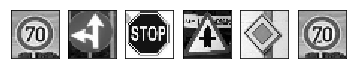

In [71]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import cv2
def loadTestingImage(path):
    img = cv2.imread(path)
    # resize to 32x32
    img = cv2.resize(img, (32, 32), interpolation = cv2.INTER_CUBIC)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

s1 = loadTestingImage('testing/s1.jpg')
s2 = loadTestingImage('testing/s2.jpg')
s3 = loadTestingImage('testing/s3.jpg')
s4 = loadTestingImage('testing/s4.jpg')
s5 = loadTestingImage('testing/s5.jpg')
s6 = loadTestingImage('testing/s6.jpg')

all_imgs = [s1,s2,s3,s4,s5,s6]
correct_labels = [4, 37, 14, 11,12,4]
imgs = [preprocess_input_image(img) for img in all_imgs]

for i in range(len(imgs)):
    ax = plt.subplot(1,len(imgs),i+1)
    if grayscaling_samples:
        ax.imshow(imgs[i], cmap='gray')
    else:
        ax.imshow(imgs[i])
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

### Predict the Sign Type for Each Image

In [72]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    input_features = np.reshape(imgs, [len(imgs), 32, 32, 1])
    result_logits = sess.run(logits, feed_dict = {tf_inputs : input_features, tf_keep_prob : 1.0})
    clazzes = np.argmax(result_logits, axis=1)
    print(clazzes)

[ 4 37 14 11 12  4]


### Analyze Performance

In [73]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
correct = 0
for i in range(len(clazzes)):
    print("Input", i, "recognized as:'", signnames[clazzes[i]], clazzes[i], "'. Correct." if clazzes[i]  == correct_labels[i] else "'. Wrong, correct class: ", correct_labels[i])
    correct += 1 if clazzes[i] == correct_labels[i] else 0
print("Accuracy: {:.2f}%".format(correct / len(clazzes) * 100))

Input 0 recognized as:' Speed limit (70km/h) 4 '. Correct. 4
Input 1 recognized as:' Go straight or left 37 '. Correct. 37
Input 2 recognized as:' Stop 14 '. Correct. 14
Input 3 recognized as:' Right-of-way at the next intersection 11 '. Correct. 11
Input 4 recognized as:' Priority road 12 '. Correct. 12
Input 5 recognized as:' Speed limit (70km/h) 4 '. Correct. 4
Accuracy: 100.00%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [74]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
tf_logits = tf.placeholder(tf.float32)
tf_softmax = tf.nn.softmax(tf_logits)
topK = tf.nn.top_k(tf_softmax, k = 5)
with tf.Session() as sess:
    tk, result_softmax = sess.run([topK, tf_softmax], feed_dict={tf_logits:result_logits, tf_keep_prob:1.0})
    print(tk)

TopKV2(values=array([[  1.00000000e+00,   2.76116359e-14,   1.65766465e-14,
          4.15310635e-19,   1.07647641e-21],
       [  9.99999881e-01,   6.10004278e-08,   2.41754017e-09,
          2.11643680e-09,   1.52307245e-09],
       [  9.98120129e-01,   5.50784636e-04,   4.93568834e-04,
          2.60874367e-04,   2.25307871e-04],
       [  9.82789755e-01,   1.71781201e-02,   2.92915702e-05,
          2.84285488e-06,   4.70099026e-09],
       [  1.00000000e+00,   1.10974847e-08,   6.38936473e-12,
          8.95093678e-13,   1.66033284e-13],
       [  1.00000000e+00,   1.50303811e-10,   9.35809590e-12,
          4.77220248e-17,   2.82361773e-19]], dtype=float32), indices=array([[ 4,  1,  0,  8, 14],
       [37, 17, 40,  1, 14],
       [14, 26, 22, 36, 18],
       [11, 12, 40, 30, 21],
       [12, 40, 32, 11, 41],
       [ 4,  0,  1,  8, 14]], dtype=int32))


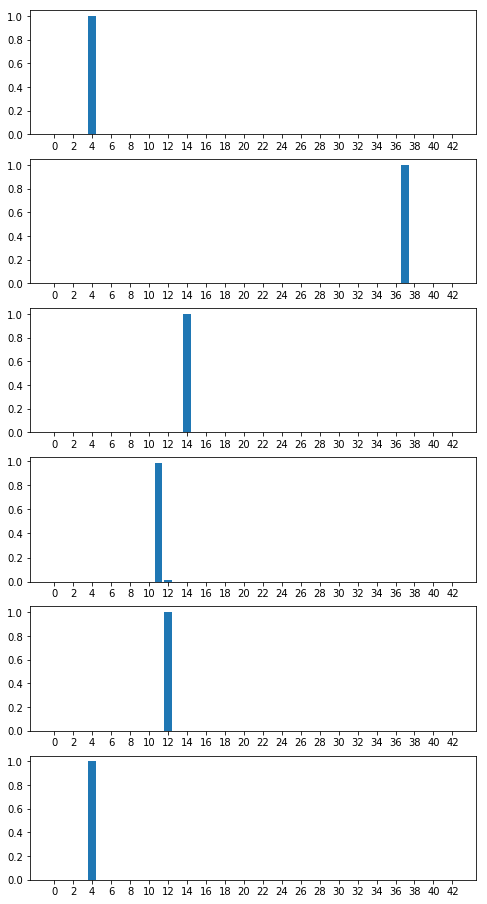

In [75]:
# visualizing
plt.figure(figsize=(8,16))
for idx, result in enumerate(result_softmax):
    ax = plt.subplot(len(result_softmax),1, idx + 1)
    ax.bar(range(n_classes), result)
    ax.set_xticks(range(0, n_classes, 2))
plt.show()

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [21]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0, :,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

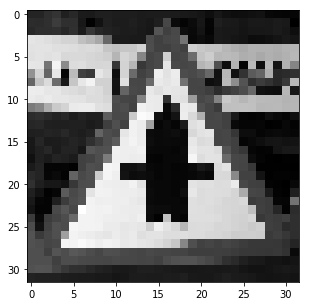

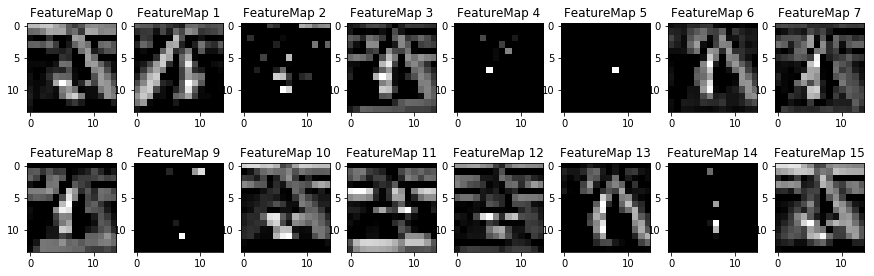

In [122]:
in_data = imgs[3].reshape((32, 32, 1))
plt.figure(1, figsize=(5,5))
plt.imshow(in_data.reshape((32, 32)), cmap="gray")
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    x = tf_inputs
    outputFeatureMap([in_data], conv1, -1, -1, 2)

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

For visualizations of layer:conv2 I could not get much information intuitively, but there're different patterns among the feature maps. Some of which are pure black, meaning nothing(or, zeros) will be fed into the following layer. If each feature map representing a intrinsic correlationship of the input features, may be it means the model is trying to detect some specific features combination but failed to detect any?

Visualizations of layer:conv1 gives more human perceivable information. Taking the test image from the last code cell for example. Feature map 0 looks like the line band of the traffic sign with some specific slope range(top-left to bottom-right), while feature map 1 looks like the result of doing the same scanning but for a diffrent range of slope(top-right to bottom-left).

Some feature maps look similar(feature map 6 vs feature map 13). I am not sure whether this is a signature that I was introducing some superfluous filters or not, or may be just because of my insufficient inspection of output feature maps for different inputs; they might be looked differently for some other images.

Some feature maps are nearly pure black, with some white point scattered around. Is this because after training, the model discovered some blocks are distinctive and useful for the task of recognition?

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 